**Hi everyone, after a long time I came back with ML prediction. The performance of students will be significant for all school. I want to decide the performance of the students with ML modelling. First, I prepared data before the modelling like are there any missing value, mean scores of exam resulst, correlation and so on.**

# Libraries

In [1]:
# Basic Import
import numpy as np
import pandas as pd

# Vis.
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# Data Preparation

In [2]:
data = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#data.columns

In [4]:
data["mean_scores"] = (data["math score"] + data["reading score"] + data["writing score"]) / 3

In [5]:
# There is no missing value so I want to look statistical information with describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean_scores                  1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [6]:
data.describe().T
# data is distributed as normally but,
# math score has 0 point cause math is harder than other all the time.
# when I look the data, I can see min exam_score is 27.
# Values of mean and 50% is so close.

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
mean_scores,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


In [7]:
data.corr()
# I want to look before I do get_dummies

,math score,reading score,writing score,mean_scores
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
mean_scores,0.918746,0.970331,0.965667,1.000000


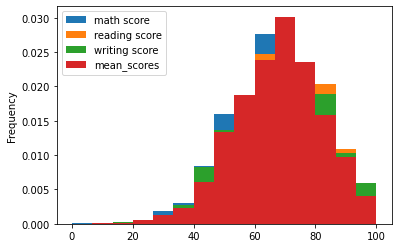

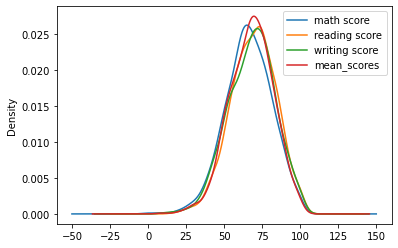

In [8]:
import matplotlib.pyplot as plt
# I did that to see histogram plot and distribution of exam_scores

def histogramPlot(variable):
    variable.plot(kind = "hist", density = True, bins = 15)
    variable.plot(kind = "kde");

if __name__=='__main__':
    histogramPlot(data)

In [9]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [10]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'mean_scores'],
      dtype='object')

In [11]:
def groupbyFunc(data, feature):
    # The function that you can use to analyze the mean of the features you have given and their situation in the data.
    values = data[feature].value_counts()
    feature_analysis = data.groupby(feature).mean()
    return values,feature_analysis    
    
    
# Firstly
groupbyFunc(data, "parental level of education")


(some college          226
 associate's degree    222
 high school           196
 some high school      179
 bachelor's degree     118
 master's degree        59
 Name: parental level of education, dtype: int64,
                              math score  reading score  writing score  \
 parental level of education                                             
 associate's degree            67.882883      70.927928      69.896396   
 bachelor's degree             69.389831      73.000000      73.381356   
 high school                   62.137755      64.704082      62.448980   
 master's degree               69.745763      75.372881      75.677966   
 some college                  67.128319      69.460177      68.840708   
 some high school              63.497207      66.938547      64.888268   
 
                              mean_scores  
 parental level of education               
 associate's degree             69.569069  
 bachelor's degree              71.923729  
 high school      

You can reach relationship between your feature and its values so 
- **I can say: when parents of the student were graduated the master degree and bachelor degree, students are better at lessons**

In [12]:
# Secondly
groupbyFunc(data, "race/ethnicity")

(group C    319
 group D    262
 group B    190
 group E    140
 group A     89
 Name: race/ethnicity, dtype: int64,
                 math score  reading score  writing score  mean_scores
 race/ethnicity                                                       
 group A          61.629213      64.674157      62.674157    62.992509
 group B          63.452632      67.352632      65.600000    65.468421
 group C          64.463950      69.103448      67.827586    67.131661
 group D          67.362595      70.030534      70.145038    69.179389
 group E          73.821429      73.028571      71.407143    72.752381)

 **I'm not racist but**
- We can see obviously group E is the best score for all lessons and
- Group A is the worst score 

In [13]:
# Lastly
groupbyFunc(data, "gender")

(female    518
 male      482
 Name: gender, dtype: int64,
         math score  reading score  writing score  mean_scores
 gender                                                       
 female   63.633205      72.608108      72.467181    69.569498
 male     68.728216      65.473029      63.311203    65.837483)

Lesson by lesson analysis is :

- **When the result of math score of males is better than females.**
- **The result of reading and writing score of females is better than males so**
- **Females are more successful than males.**

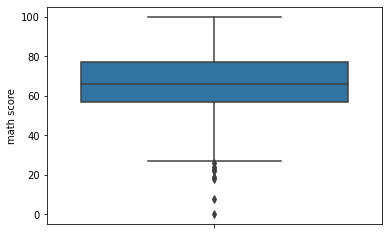

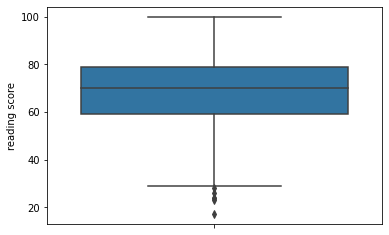

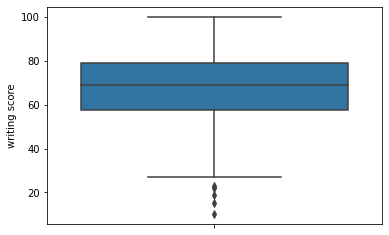

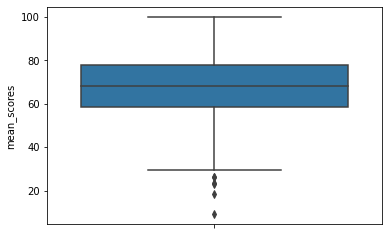

In [14]:
# I have to drop values of outlier scores to take a better rmse value.
sns.boxplot( y = data["math score"])
plt.show()

sns.boxplot(y = data["reading score"] )
plt.show()


sns.boxplot(y = data["writing score"])
plt.show()

sns.boxplot(y = data["mean_scores"])
plt.show()


In [15]:
def drop_outliers(df,column_name,lower,upper):
    drop_outliers = df[column_name].between(df[column_name].quantile(lower), df[column_name].quantile(upper))
    
    print(str(df[column_name][drop_outliers].size) + "/" + str(df[column_name].size) + " data points remain.") 

    index_names = df[~drop_outliers].index
    return df.drop(index_names)


new_data = drop_outliers(data,"mean_scores",0.05,0.95) 

900/1000 data points remain.


**I dropped outlier values from mean scores before I prepare data that to model and get_dummies function**

In [16]:
print("data:",data.shape)
print("new_data:", new_data.shape)

data: (1000, 9)
new_data: (900, 9)


In [17]:
math_score = new_data["math score"]
reading_score = new_data["reading score"]
writing_score = new_data["writing score"]
mean_score = new_data["mean_scores"]
X_features = new_data.drop(["math score","reading score","writing score","mean_scores"],axis = 'columns') 

**My target value is mean_score so I seperated the data.**

# Get Dummy Function

In [18]:
X_features

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
...,...,...,...,...,...
994,male,group A,high school,standard,none
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [19]:
X_features_encoded = X_features.apply(lambda x: x.astype('category')) 

X_features_encoded = pd.get_dummies(X_features_encoded,drop_first= True)
X_features_encoded


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,0,0,0,0,0,1,0,0,0,1,1
996,1,0,1,0,0,0,1,0,0,0,0,1
997,0,0,1,0,0,0,1,0,0,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0


- **Get dummies function is the best function that I have ever worked because If you want to seperate categorical columns from the data, 'generally' you can use this function and LabelEncoder().** 

In [20]:
mean_score

0      72.666667
1      82.333333
3      49.333333
4      76.333333
5      77.333333
         ...    
994    62.666667
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: mean_scores, Length: 900, dtype: float64

# Train Test 

In [21]:
target = mean_score
X_train, X_val, y_train, y_val = train_test_split(X_features_encoded, 
                                                      target, 
                                                      test_size=0.4, 
                                                      shuffle = True, 
                                                      random_state=1)

# Modelling

In [22]:
# true ---> real     predicted---> predict
def calculateModel(real, predict):
    rmse = np.sqrt(mean_squared_error(real, predict))
    r2 = r2_score(real, predict)
    print("rmse:",rmse)
    print("r2 score:",r2)

# RMSE - R^2 Score

In [23]:
## Random Forest and Linear Model that I tried to calculate model
print("Random Forest Regressor")
print("------------")
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
rf_pred = rf.predict(X_train)
print("Train set of RF")
calculateModel(y_train,rf_pred)

print("------------")
print("Test set of RF")
rf_pred_val= rf.predict(X_val)
calculateModel(y_val,rf_pred_val)

print("------------")


print("Linear Regression")
print("------------")
lr = LinearRegression(normalize=True).fit(X_train, y_train)
lr_pred = lr.predict(X_train)
print("Train set of LR")
calculateModel(y_train,lr_pred)

print("------------")
print("Test set of LR")
lr_pred_val= lr.predict(X_val)
calculateModel(y_val,lr_pred_val)


Random Forest Regressor
------------
Train set of RF
rmse: 8.574682009141531
r2 score: 0.41783250568166785
------------
Test set of RF
rmse: 11.790181517501644
r2 score: -0.08320858927677355
------------
Linear Regression
------------
Train set of LR
rmse: 10.346337851989173
r2 score: 0.15241118329678904
------------
Test set of LR
rmse: 10.33611640104146
r2 score: 0.1674968310397632
